# Data Analysis and Visualization for Best Books in the 2000's Decade

Our boss from publishing house wants an information about Best Books of 2000s Decade

Our main approach here would be the understanding of which features can affect a book to be on the best books list.

we are doing this by scrabbing data from good reads wensite datebase 

![image](test1.jpg)


## Data Preparation
1. Importing Libraries and Data Set
2. Understanding Data Set
3. Cleaning Data Set

### 1.Importing Libraries and Data Set

In [24]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

In [25]:
#Importing Data
def importing_data():
    df=pd.read_csv("/work/Good_reads_Best_2000s/Data.csv")
    return df
df=importing_data()

### 2.Understanding Data Set

In [26]:
#Showing first 5 row of dataset
df.head()

,URL,Title,Author,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series,Genres,Awards,Places
0,https://www.goodreads.com/book/show/136251.Har...,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,2959601.0,68457.0,4.6,759.0,2007.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,"[['London, England', '(United Kingdom)'], ['Ho..."
1,https://www.goodreads.com/book/show/2767052-th...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,6685627.0,175504.0,4.3,374.0,2008.0,1.0,"['Young Adult', 'Fiction', 'Dystopia']",['Locus Award Nominee for Best Young Adult Boo...,"[['District 12, Panem', 'Capitol, Panem', 'Pan..."
2,https://www.goodreads.com/book/show/1.Harry_Po...,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,2575456.0,42018.0,4.5,652.0,2006.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Locus Award Nominee for Best Young Adult Nov...,[['Hogwarts School of Witchcraft and Wizardry'...
3,https://www.goodreads.com/book/show/6.Harry_Po...,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,2750013.0,49585.0,4.5,734.0,2002.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']","['Hugo Award for Best Novel (2001)', ""Mythopoe...","[['Hogwarts School of Witchcraft and Wizardry,..."
4,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2653494.0,45376.0,4.5,870.0,2004.0,1.0,"['Fantasy', 'Young Adult', 'Fiction']",['Bram Stoker Award for Works for Young Reader...,[['Hogwarts School of Witchcraft and Wizardry'...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   URL                1000 non-null   object 
 1   Title              1000 non-null   object 
 2   Author             1000 non-null   object 
 3   Number of Ratings  995 non-null    float64
 4   Number of Reviews  995 non-null    float64
 5   Average Ratings    978 non-null    float64
 6   Number of Pages    992 non-null    float64
 7   Published Year     994 non-null    float64
 8   Series             995 non-null    float64
 9   Genres             992 non-null    object 
 10  Awards             1000 non-null   object 
 11  Places             671 non-null    object 
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


We have 12 different columns which can be categorical or numerical data in our data set. Also, we can say that there are some non-values that we should take care of! Let's check how big they are.

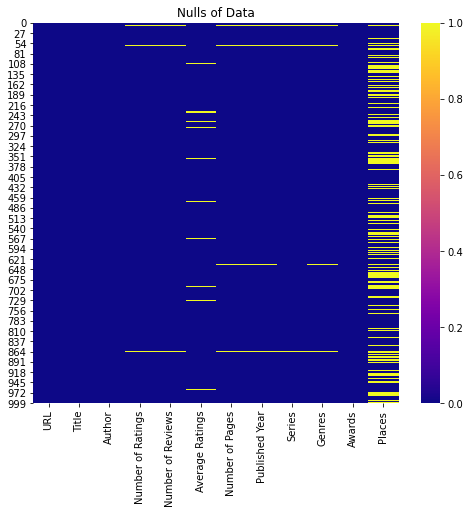

In [28]:
#Heat map of null cells
def plotting_null_data():
    fig = plt.figure(figsize=(18,7))
    fig.add_subplot(121)
    plt.title('Nulls of Data')
    sns.heatmap(df.isnull(), cmap='plasma')
    return plt.show()
plotting_null_data()

In [29]:
print("Percentage of Null Values")
missing_percentage = df.isnull().sum() * 100 / len(df) #Calculating percentage of missing values
missing_percentage

Percentage of Null Values


URL                   0.0
Title                 0.0
Author                0.0
Number of Ratings     0.5
Number of Reviews     0.5
Average Ratings       2.2
Number of Pages       0.8
Published Year        0.6
Series                0.5
Genres                0.8
Awards                0.0
Places               32.9
dtype: float64

We have pretty less null value in our data set. Only "Places" have 32% null value.

Lets look at **basic statistical information** of our data set.

In [30]:
df.describe()

,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series
count,9.950000e+02,995.000000,978.000000,992.000000,994.00000,995.000000
mean,1.815787e+05,7786.791960,3.929346,412.304435,2006.05332,0.510553
std,4.269193e+05,13021.106839,0.253346,216.892706,2.64026,0.500140
min,1.500000e+01,0.000000,3.000000,6.000000,1998.00000,0.000000
25%,2.989800e+04,1796.000000,3.800000,302.000000,2004.00000,0.000000
50%,7.196400e+04,3669.000000,3.900000,374.000000,2006.00000,1.000000
75%,1.567095e+05,7983.000000,4.100000,472.250000,2008.00000,1.000000
max,6.685627e+06,175504.000000,4.800000,4100.000000,2018.00000,1.000000


Here is the results;
* The mean value and maximum and minimum values of the **Number of Ratings** differences are too big! That means we should **normalize** this column.
* The mean value and maximum and minimum values of the **Number of Reviews** differences are too big! That means we should **normalize** this column.
* The mean value and maximum and minimum values of the **Average Ratings** differences are too close! That means we should **scale** this column, for better visualizing and understanding the distributions.
* The mean value and maximum and minimum values of the **Number of Pages** differences are too big! That means we should **normalize** this column.
* We can count **Year** and **Series** columns as **categorical** data. 


#### Pre-Visualisation

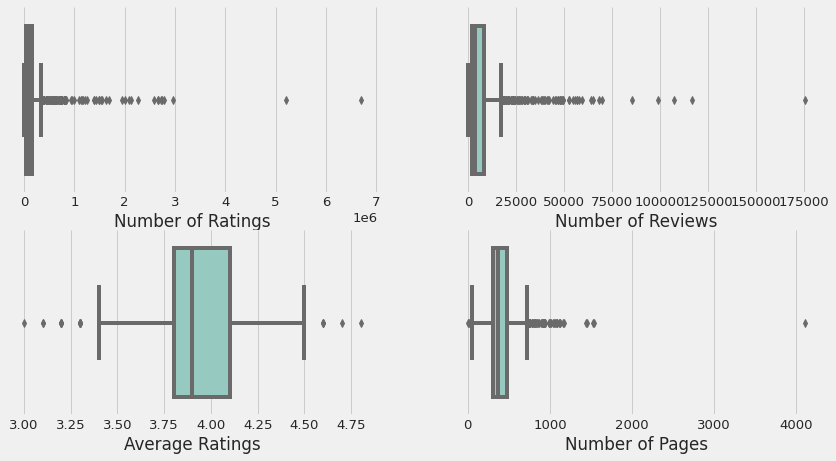

In [42]:
""" Number of Ratings  995 non-null    float64
 4  Number of Reviews  995 non-null    float64
 5  Average Ratings    978 non-null    float64
 6  Number of Pages    992 non-null    float64 """

numerical_features = ['Number of Ratings', 'Number of Reviews', 'Average Ratings', 'Number of Pages']

plt.figure(figsize=(13, 7))
sns.set(font_scale= 1.2)
plt.style.use('fivethirtyeight')

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature],palette="Set3")
    #sns.countplot(data=train_imputed, x=feature, hue='Survived', palette=palette_6)  
    
sns.despine()


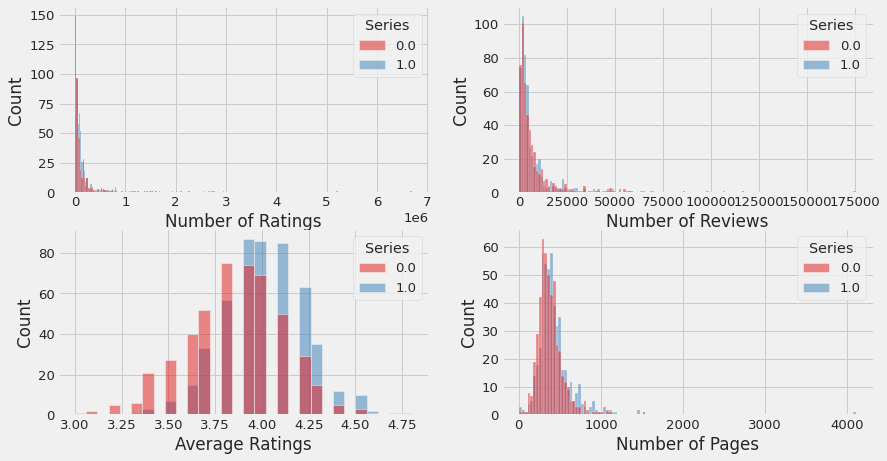

In [47]:
plt.figure(figsize=(13, 7))
sns.set(font_scale= 1.2)
plt.style.use('fivethirtyeight')

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    #sns.boxplot(x=df[feature],palette="Set3")
    sns.histplot(x=df[feature], hue=df['Series'], palette="Set1")  
    
sns.despine()

### 2.Cleaning Data Set

#### Filling the null data 
There are a lot of approaches for filling the data.
* For filling numerical data we will use mean values 
* For filling categorical data we will use mode values

**Filling numerical data**


In [8]:
#Filling numerical data of Number of Ratings
df['Number of Ratings'] = df['Number of Ratings'].fillna(df['Number of Ratings'].mean())
#Filling numerical data of Number of Reviews
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())
#Filling numerical data of Average Ratings
df['Average Ratings'] = df['Average Ratings'].fillna(df['Average Ratings'].mean())
#Filling numerical data of Number of Pages
df['Number of Pages'] = df['Number of Pages'].fillna(df['Number of Pages'].mean())

**Filling categorical data**

In [9]:
#Filling categorical data of Published Year
df['Published Year'] = df['Published Year'].fillna(df['Published Year'].mode()[0])
#Filling categorical data of Series
df['Series'] = df['Series'].fillna(df['Series'].mode()[0])
#Filling categorical data of Genres
df['Genres'] = df['Genres'].fillna(df['Genres'].mode())
#Filling categorical data of Places
df['Places'] = df['Places'].fillna(df['Places'].mode()[0])

Lets look at last status of data set

In [10]:
print("Percentage of Updated Null Values")
missing_percentage_updated = df.isnull().sum() * 100 / len(df) #Calculating percentage of missing values
missing_percentage_updated

Percentage of Updated Null Values


URL                  0.0
Title                0.0
Author               0.0
Number of Ratings    0.0
Number of Reviews    0.0
Average Ratings      0.0
Number of Pages      0.0
Published Year       0.0
Series               0.0
Genres               0.8
Awards               0.0
Places               0.0
dtype: float64

Now we don't have any missing values!



### Data Cleaning
We need to interest with empty brackets and format problems

**Lets create general pattern of regex used for cleaning the data**

These scripts clean the string data in the Dataframe and makes the usable for data analysis

In [11]:
pattern = re.compile(r'(\[|\]|\'|\")+')
pattern2 = re.compile(r'(\\n|...more)+')

**Creating a new column with the number of awards won by a book. **


In [12]:
awards_no = []

for i, j in df['Awards'].items():
    if j is np.nan:
        j = np.nan
    else:
        j = re.sub(pattern, '', j)
        if len(j) > 5:
            j = re.sub(pattern2, ',', j).split(',')
            j = len(j)
        else:
            j = np.nan
    awards_no.append(j)


df['Awards_no'] = awards_no

**Modifying the Genres column values to make in to a list.**


In [13]:
genres_l = []
genres_freq = {}
for i, j in df['Genres'].items():
    j = re.sub(pattern, '', str(j)).split(',')
    for word in j:
        if word in genres_freq:
            genres_freq[word] += 1
        else:
            genres_freq[word] = 1
    genres_l.append(j)

df['Genres'] = genres_l
print(genres_freq)


{'Fantasy': 199, ' Young Adult': 147, ' Fiction': 366, 'Young Adult': 94, ' Dystopia': 26, 'Historical Fiction': 74, 'Fiction': 280, ' Romance': 72, ' Fantasy': 112, 'nan': 8, ' Historical Fiction': 105, ' Historical': 34, ' Contemporary': 104, ' Mystery': 71, ' Thriller': 46, ' Classics': 3, ' Science Fiction': 49, ' Chick Lit': 27, ' Mythology': 9, 'Nonfiction': 88, ' Memoir': 42, ' Biography': 30, ' Urban Fantasy': 25, ' Paranormal': 63, ' Inspirational': 2, ' Travel': 5, ' Epic Fantasy': 18, ' Literary Fiction': 11, ' Novels': 27, ' History': 23, ' True Crime': 5, ' Humor': 49, ' China': 8, ' Vampires': 33, ' Horror': 15, ' Economics': 6, ' Business': 9, ' Magical Realism': 10, ' Adult Fiction': 7, ' India': 9, 'Graphic Novels': 16, ' Nonfiction': 54, ' Animals': 7, 'Memoir': 7, ' Crime': 22, ' Literature': 10, ' Christian': 2, ' Christian Fiction': 1, ' Africa': 16, ' Food': 9, ' Science': 9, ' Holocaust': 3, 'Horror': 19, ' Dogs': 2, ' Psychology': 7, ' Health': 4, 'History': 21,

**Cleaning the Setting data and makes it usable.**

In [14]:
places = []
places_freq = {}
for i, j in df['Places'].items():
    if j is np.nan:
        j = np.nan
    elif len(j) > 5:
        j = re.sub(pattern2, '', j)
        j = re.sub(pattern, '', j).strip('').split(',')
        for word in j:
            if word in places_freq:
                places_freq[word] += 1
            else:
                places_freq[word] = 1
    else:
        j = np.nan
    places.append(j)

df['Places'] = places
print(places_freq)

{'London': 23, ' England': 82, ' (United Kingdom)': 74, ' Hogwarts School of Witchcraft and Wizardry': 1, ' Pagford': 1, 'District 12': 2, ' Panem': 6, ' Capitol': 2, ' (United States)': 519, 'Hogwarts School of Witchcraft and Wizardry': 3, '1994': 1, ' Scotland': 6, ' United Kingdom': 5, ' London': 21, 'Molching': 1, '1939': 2, ' (Germany)': 15, ' Germany': 2, 'Chicago': 17, ' Illinois': 31, 'United States of America': 395, 'Jackson': 2, ' Mississippi': 5, '1962': 3, ' Jackson': 1, 'Afghanistan': 1, ' Kabul': 1, ' (Afghanistan)': 4, ' Herat': 1, 'Forks': 4, ' Washington': 22, ' Phoenix': 2, ' Arizona': 5, ' Washington (state)': 9, ' Joliet': 1, '1932': 2, ' Ithaca': 1, ' New York': 67, 'Stockholm': 5, ' (Sweden)': 9, ' Hedeby Island': 1, ' Hedestad': 1, ' Stockholm': 1, ' Sweden': 4, ' …less': 50, 'Pacific Ocean': 1, ' Pondicherry': 1, ' (India)': 8, ' Toronto': 3, ' Ontario': 7, ' (Canada)': 19, ' Tomatlan': 1, ' (Mexico)': 10, 'Paris': 9, ' (France)': 25, ' France': 3, 'England': 12

**Lets look at last form of the data frame!**

In [15]:
df.head()

,URL,Title,Author,Number of Ratings,Number of Reviews,Average Ratings,Number of Pages,Published Year,Series,Genres,Awards,Places,Awards_no
0,https://www.goodreads.com/book/show/136251.Har...,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,2959601.0,68457.0,4.6,759.0,2007.0,1.0,"[Fantasy, Young Adult, Fiction]",['Locus Award Nominee for Best Young Adult Nov...,"[London, England, (United Kingdom), Hogwart...",8.0
1,https://www.goodreads.com/book/show/2767052-th...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,6685627.0,175504.0,4.3,374.0,2008.0,1.0,"[Young Adult, Fiction, Dystopia]",['Locus Award Nominee for Best Young Adult Boo...,"[District 12, Panem, Capitol, Panem, Panem...",41.0
2,https://www.goodreads.com/book/show/1.Harry_Po...,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,2575456.0,42018.0,4.5,652.0,2006.0,1.0,"[Fantasy, Young Adult, Fiction]",['Locus Award Nominee for Best Young Adult Nov...,"[Hogwarts School of Witchcraft and Wizardry, ...",3.0
3,https://www.goodreads.com/book/show/6.Harry_Po...,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,2750013.0,49585.0,4.5,734.0,2002.0,1.0,"[Fantasy, Young Adult, Fiction]","['Hugo Award for Best Novel (2001)', ""Mythopoe...","[Hogwarts School of Witchcraft and Wizardry, 1...",9.0
4,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,2653494.0,45376.0,4.5,870.0,2004.0,1.0,"[Fantasy, Young Adult, Fiction]",['Bram Stoker Award for Works for Young Reader...,"[Hogwarts School of Witchcraft and Wizardry, ...",9.0


### Normalising-Scaling The Data
**Creating General Function for Min-Max Normalising**

In [16]:
def min_max(column):
    """ Returns the Min-Max normalised values for the average ratings value.
    Can filter elements greater than a given threshhold value i.e. the artificial minimum"""
    column = ((column - column.min()) / column.max() - column.min()) 
    return column

**Min-Max Normalising Number of Ratings**

In [17]:
df_normalised=df
df_normalised["Number of Ratings"]=min_max(df_normalised["Number of Ratings"])

**Min-Max Normalising Number of Reviews**

In [18]:
df_normalised["Number of Reviews"]=min_max(df_normalised["Number of Reviews"])

**Min-Max Normalising Number of Pages**

In [19]:
df_normalised["Number of Pages"]=min_max(df_normalised["Number of Pages"])

**Scaling 0 to 10 Average Ratings**

In [23]:
df_normalised["Average Ratings"]=2*df_normalised["Average Ratings"]

## Pre-Conclusions


Places feature visualization

In [21]:
places_freq_list=[]
places_freq[]

SyntaxError: invalid syntax (<ipython-input-21-ca6073d725d9>, line 2)

## Data Visualization
1. Correlation Maps
2. Data Distributions
3. Interesting Informations
4. Graphs with Places

### 1.Correlation Maps

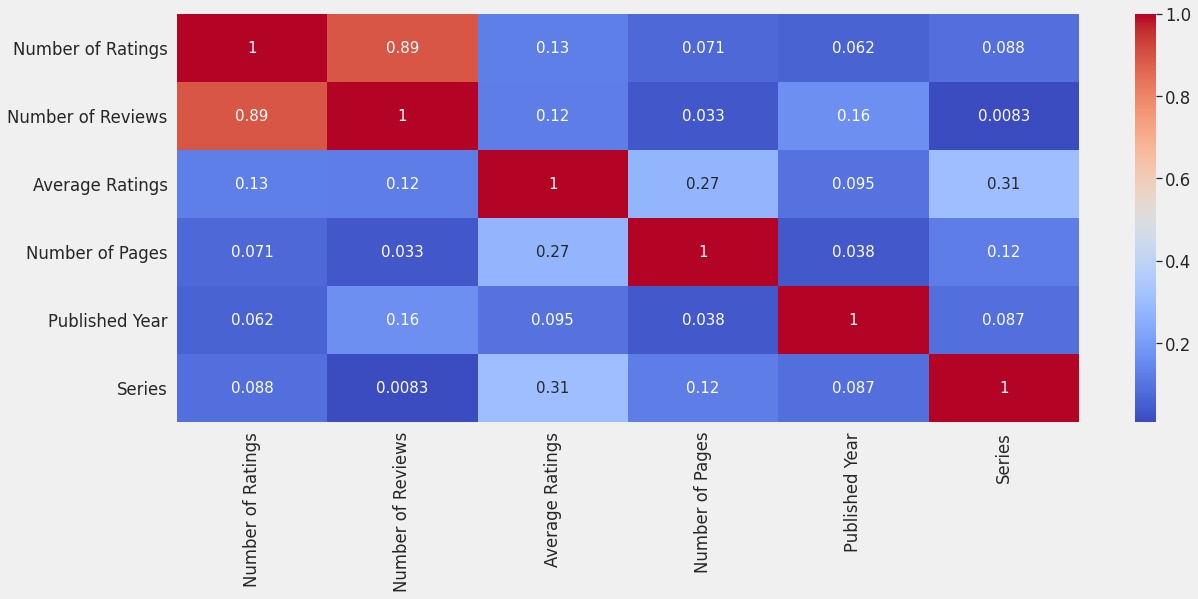

In [60]:
#Creating heat map
plt.figure(figsize=(18, 7))
sns.set(font_scale=1.5)
sns.set_style('white')
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

1. The most significant correlation that appears here is the **Number of Ratings** and **Number of Reviews** they are obviously co-related positively.
2. **Average Rattings** slightly co-relates positively with some other fields like:
    * Number of pages 
    * Whether it's a series or not 
    * The published year which just could mean that the user is more active through time no more 
    


### 2.Data Distributions

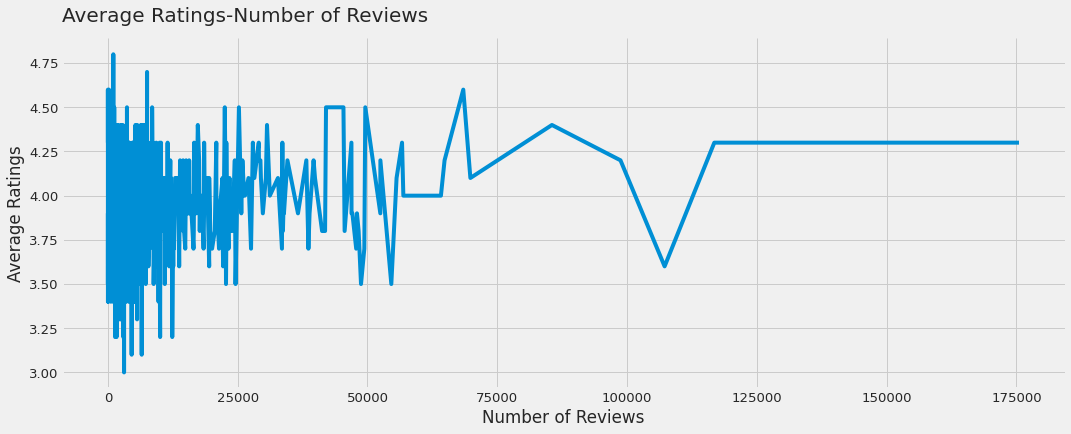

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.lineplot(data=df, x=df['Number of Reviews'], y=df['Average Ratings'])
ax.set_title('Average Ratings-Number of Reviews', size=20, loc='Left', y=1.03)

sns.despine()
plt.show()

### 4.Graphs with Places

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0867bd3-5624-476b-af8a-bd1f917bd510' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>